<a href="https://colab.research.google.com/github/lauralpezb/Presentacion_DataGalaxy/blob/main/clean_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

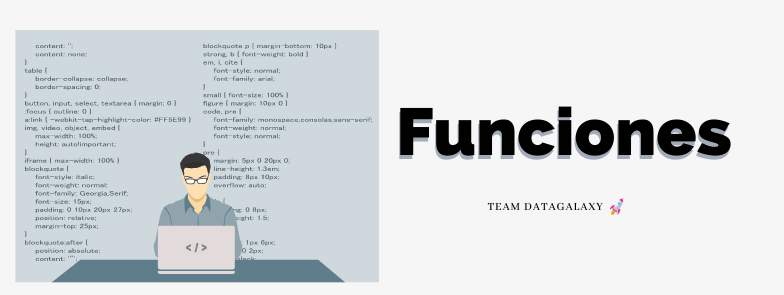


## Clean code in Python

Capitulo 3
- Arguments in functions and methods
- Final remarks on good practices for
software design


# Funciones

Una función te permite definir un bloque de código reutilizable que se puede ejecutar muchas veces dentro de tu programa.

- Modularización: permite segmentar un programa complejo en una serie de partes o módulos más simples, facilitando así la programación y el depurado.
- Reutilización: permite reutilizar una misma función en distintos programas.


## Argumentos y métodos

Recordemos:

Objeto mutable: Se pueden modificar
* List
* Dict
* Set

Objeto inmutable: No se modifican
* Strings
* Int 
* Float 
* Complex
* Bool 
* Tuple 


Regla 1: En una función todos los argumentos son pasados como valor.

Una función puede o no modificar los parámetros que recibe, dependiendo de su tipo:

- Si estamos pasando objetos mutables y el cuerpo de la función lo modifica, entonces, por supuesto, modificará el objeto. 

💡 Dato: Si necesitas añadir los elementos individuales de una lista o tupla a la lista original, debes usar el método extend() en lugar de append().  


- Si el objeto es inmutable, la función no lo modifica


In [ ]:
#Crear listas
fruits = ['apple', 'banana', 'cherry']
cars = ['Ford', 'BMW', 'Volvo']

#Extend
fruits.extend(cars)
print(fruits)

#Append
fruits.append(cars)
print(fruits)

#+
fruits += cars
print(fruits)

['apple', 'banana', 'cherry', 'Ford', 'BMW', 'Volvo']
['apple', 'banana', 'cherry', 'Ford', 'BMW', 'Volvo', ['Ford', 'BMW', 'Volvo']]
['apple', 'banana', 'cherry', 'Ford', 'BMW', 'Volvo', ['Ford', 'BMW', 'Volvo'], 'Ford', 'BMW', 'Volvo']


Miremos con una función:

In [ ]:
def function(argument):
  argument += " in function"
  print(argument)

In [ ]:
mutable = list('Hello')
inmutable = 'Hello'

print(mutable)
print(inmutable)

['H', 'e', 'l', 'l', 'o']
Hello


In [ ]:
function(mutable)
mutable

['H', 'e', 'l', 'l', 'o', ' ', 'i', 'n', ' ', 'f', 'u', 'n', 'c', 't', 'i', 'o', 'n']


['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'i',
 'n',
 ' ',
 'f',
 'u',
 'n',
 'c',
 't',
 'i',
 'o',
 'n']

In [ ]:
function(inmutable)
inmutable

Hello in function


'Hello'

Lo que hacemos con el argumento en la función es algo como esto:

In [ ]:
a = list(range(5))
b = a
b.append(99)
print('a: ', a)
print('b: ', b)

a:  [0, 1, 2, 3, 4, 99]
b:  [0, 1, 2, 3, 4, 99]


Recomendación 💡

Evitar el uso de objetos mutables como argumentos de una función.

## Número de argumentos

Para pasar varios argumentos usamos *

In [ ]:
def f(first, second, third):
  print(first)
  print(second)
  print(third)

In [ ]:
l = [1, 2, 3]
f(*l)

1
2
3


In [ ]:
def show(e, rest):
  print("Element: {0} - Rest: {1}".format(e, rest))

first, *rest = [1, 2, 3, 4, 5]
show(first, rest)

*rest, last = range(6)
show(last, rest)

Element: 1 - Rest: [2, 3, 4, 5]
Element: 5 - Rest: [0, 1, 2, 3, 4]


In [ ]:
first, *middle, last = range(6)
print("""first: {} 
middle: {} 
last: {} 
""".format(first, middle, last))

first, last, *empty = 1, 2
print('first: {} \nlast: {} \nempty: {} '.format(first, last, empty))

first: 0 
middle: [1, 2, 3, 4] 
last: 5 

first: 1 
last: 2 
empty: [] 


Veamos un caso con bases de datos:

[@dataclass](https://docs.python.org/3/library/dataclasses.html)

In [ ]:
from dataclasses import dataclass

USERS = [(i, f"first_name_{i}", f"last_name_{i}") for i in range(1_000)]

@dataclass
class User:
  user_id: int
  first_name: str
  last_name: str

def bad_users_from_rows(dbrows) -> list:
  """A bad case (non-pythonic) of creating ``User``s from DB rows."""
  return [User(row[0], row[1], row[2]) for row in dbrows]

In [ ]:
[User(*row) for row in dbrows]

In [ ]:
def users_from_rows(dbrows) -> list:
  """Create ``User``s from DB rows."""
  return [User(user_id, first_name, last_name) for (user_id, first_name, last_name) in dbrows]

En la primera versión de la función (bad_users_from_rows), tenemos datos expresados ​​en el formulario row[0], row[1] y row[2], que no nos dice nada sobre lo que significan. Por otra parte, variables como user_id, first_name y last_name hablan por sí mismas.

Recomendación 💡

Poner nombre a las variables que sea explicativo

También usamos ** cuando el argumento es un diccionario

Si tenemos un diccionario y lo pasamos con ** a una función, lo que hará es escoger las claves como el nombre del parámetro y pasar el valor de esa clave como el valor de ese parámetro en esa función

In [ ]:
function(**{"key": "value"})
function(key="value")

In [ ]:
def function(**kwargs):
  print(kwargs)

function(key="value")

{'key': 'value'}


No busque claves particulares del diccionario. En su lugar, extraiga estos argumentos directamente en la definición de la función.

In [ ]:
# En vez de:
def function(**kwargs):
  timeout = kwargs.get("timeout", DEFAULT_TIMEOUT)

#Haga esto:
def function(timeout=DEFAULT_TIMEOUT, **kwargs):

## Argumentos posicionales

In [ ]:
def my_function(x, y):
  print(f"x={x}, y={y}")

my_function(1, 2)

my_function(x=1, y=2)

my_function(y=2, x=1)

my_function(1, y=2)

x=1, y=2
x=1, y=2
x=1, y=2
x=1, y=2


Esta parte se vuelve más compleja a medida que se tiene una cantidad de variables mayor. Por ejemplo, en las librerías:

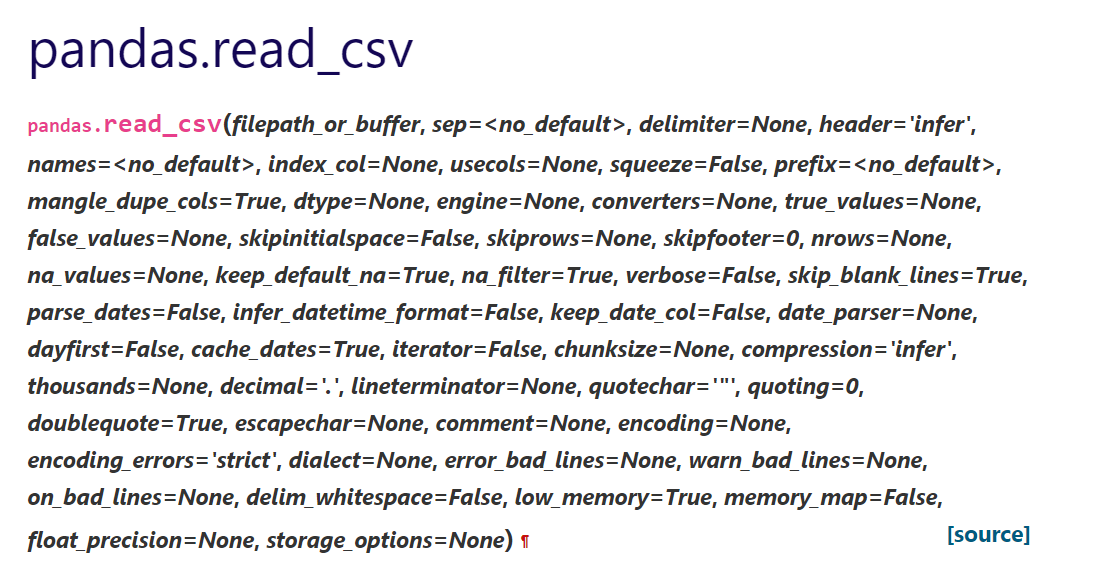

Apartir de Python 3.8 se crea una forma que permite definir parámetros estrictamente posicionales, lo que nos impide pasarle el nombre de la variable como argumento:

In [ ]:
def my_function(x, y, /):
  print(f"x={x}, y={y}")

my_function(1, 2)

my_function(x=1, y=2)

#Error por la versión de python

SyntaxError: ignored

Se usan donde no hay mucha utilidad en el nombre de las variables porque la función por si sola brinda la información necesaria para ingresar los valores.

## Argumentos como palabras claves

In [ ]:
def my_function(x, y, *args, kw1, kw2=0):
  print(f"{x=}, {y=}, {kw1=}, {kw2=}")

my_function(1, 2, kw1=3, kw2=4)

my_function(1, 2, kw1=3)

NOTA:
Si se requieren muchos parámetros para una función se recomienda subdividir en tareas.

Don't Repeat Yourself y Do One Thing:
Una función debe realizar una sola cosa.

Si hay una tarea que se realiza varias veces se recomienda hacer una función.



# Importante:

Al trabajar con objetos mutables se recomienda crear una copia del objeto en caso de que no se desee modificar.

Si se van a usar varios argumentos evitar el uso de `*args` o `**kwargs` porque puede ser confuso y con poca trazabilidad.

Tratar de usar `*args` o `**kwargs` en casos generales para aplicar sobre otra función como decoradores.

Recomendado:

[Defining Your Own Python Function](https://realpython.com/defining-your-own-python-function/)

[Keyword-only Arguments](https://python-3-for-scientists.readthedocs.io/en/latest/python3_advanced.html)

# Ortoganilidad de codigo

Hacer código independiente donde una función, módulo o clase al modificarse no afecte otras parte del código. Por lo tanto, las pruebas para cada parte serán independientes y al pasar la prueba puede garantizar que no se verá afectada la funcionalidad total o de otra parte del código.

In [ ]:
def calculate_price(base_price: float, tax: float, discount: float) -> float:
  return (base_price * (1 + tax)) * (1 - discount)

def show_price(price: float) -> str:
  return "$ {0:,.2f}".format(price)

def str_final_price(base_price: float, tax: float, discount: float, fmt_function=str) -> str:
  return fmt_function(calculate_price(base_price, tax, discount))

In [ ]:
print(str_final_price(10, 0.2, 0.5))

print(str_final_price(1000, 0.2, 0))

print(str_final_price(1000, 0.2, 0.1, fmt_function=show_price))

6.0
1200.0
$ 1,080.00


# Docstrings

Usar tres comillas """  """ para crear un texto corto donde se explique que hace la función.
- Breve explicación de la funcionalidad
- Argumentos: 
    - Nombre
    - Tipo de dato del argumento
    - Explicación
- Valores que retorna:
    - Tipo de dato

- Descripción de posibles excepciones/errores (Si las tiene)

- Comentarios adicionales

In [ ]:
def split_and_stack(df, new_names):
  """Split a DataFrame's columns into two halves and then stack
  them vertically, returning a new DataFrame with `new_names` as the
  column names.

  Args:
  df (DataFrame): The DataFrame to split.
  new_names (iterable of str): The column names for the new DataFrame.
  
  Returns:
  DataFrame
  """
  half = int(len(df.columns) / 2)
  left = df.iloc[:, :half]
  right = df.iloc[:, half:]
  return pd.DataFrame(data=np.vstack([left.values, right.values]),columns=new_names)

# Importante!

La forma en que se organiza el código también afecta el desempeño del equipo y su mantenibilidad.

En particular, tener archivos grandes con muchas definiciones (clases, funciones, constantes, y así sucesivamente) es una mala práctica.

- Contiene menos objetos para analizar y cargar en la memoria cuando el módulo
es importado.

Centralizar la información de esta manera facilita la reutilización del código y ayuda a evitar la duplicación inadvertida.

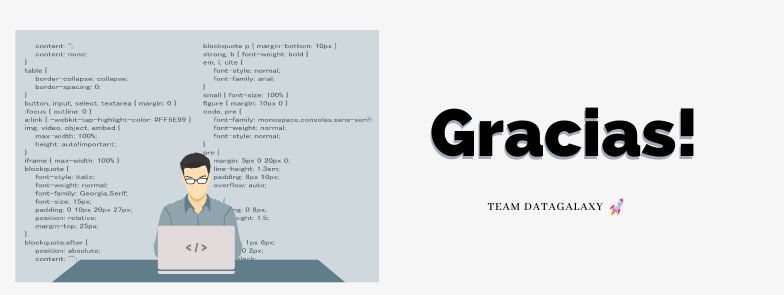